# Rastgele Ne Kadar Rastgele

Sevgili dostum Tevfik Uyarin rastgeleligi anlatirken verdigi ornegi biraz daha ayrintili olrak burada incelemek istiyorum. 

Tevfik'e gelen soru su sekilde:

In [2]:
%%html
<blockquote class="twitter-tweet" data-lang="en"><p lang="tr" dir="ltr">Bir yılda ortalama 20 adet uçak kazası gerçekleşiyorsa eğer, tamamen rasgelelik durumunda yılda bir kaç defa art arda (ya da aynı haftada) olabilir. 6 adet denemeye ait bilgi ekte: Grafikte altı denemede 1-365 arasında seçilmiş rasgele 20&#39;şer sayı görünüyor. Değerler diğerinde. <a href="https://t.co/POo5cuXYjE">pic.twitter.com/POo5cuXYjE</a></p>&mdash; Tevfik Uyar (@tevfik_uyar) <a href="https://twitter.com/tevfik_uyar/status/973316792759107584?ref_src=twsrc%5Etfw">March 12, 2018</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

Tevfigin belirtmek istedigi tamamen rastgele bir durumda belli bir diziden secilen sayilarin birbirlerine yakin olmasi rastgelelikle aciklanabilir. Yukaridaki ornekte 1 ile 365 arasinda 20 rastgele sayi seciliyor ve de bazi durumlarda iki sayinin arasindaki fark gercekten az olabilir. Bunu duruma gore hislerimizin aksine rastgelelikle ya da tesadufle aciklayabiliriz.

### Matematiksel Referans (Tamamen opsiyonel, tedirgin ederse geciniz)

En unlu olasilik dagilimlarindan bir tanesi de **Poisson** dagilimidir. **Poisson** dagilimi ortalama bir $\lambda$ degerine gore belli bir zaman icerisinde kac tane olayin gerceklesecegini ifade eder. Bir ornekle aciklayalim:  Ornegin bir restorana saatte ortalama 20 musterinin geldigini varsayalim $\lambda=20$. Fakat her saatte 20 musteri gelmseini beklemeyiz, bazen 15 musteri gelirken bazen 30 musteri de gelebilir.  **Poisson** dagilimi bize hangi olasilikla bir saate 15ten az ya da 30dan fazla musteri gelebilecegini aciklar. 

Ortalama olarak saatte 20 musterinin geldigini varsayarsak, her 3 dakikada bir musterinin gelecegini dusunebiliriz. Ancak biliyoruz ki iki musteri arasindaki zamanin uc dakikadan az ya da cok olmasi da olasidir. **Ustel** olasilik dagilim da verilen **Poisson** dagiliminda gerceklesen iki olay arasindaki zamanin dagilimini bize verir. Bizim ornegimizde saatte 20 musterinin geldigi bir restoranda **Ustel** dagilim iki musteri arasindaki gelme zamanini verecektir. 

Yukarida anlatilanlar kafanizi karistirdiysa korkmayin. Asagida bu durumu matematik olmadan sadece simulasyon yardimiyla cozmeye calisacagiz. Ancak Tevfigin bashettigi problemi matematiksel olarak tanimlamak gerekirse:

> *Bir yil (=365 gun) icerisinde ortalama 20 ucak kazasinin gerceklestigini varsayalim. Iki ucak kazasinin ardarda (ya da cok kisa zaman araligi) icerinde olmasi normal midir?* Bu durumda Ucak kazalarini **Poisson** dagilimi olarak modelleyebiliriz. $\lambda=20$ 

Poisson dagiliminda gerceklesen olaylar birbirinden bagimsizdir. Yani ornegimizde bir ucak kazasinin digerini tetiklemedigini kabul ediyoruz.  

### Simulasyon Yontemi

Ucak kazasi problemini analitik olarak cozmemiz mumkun ancak burada rastgeleligi daha ayrintili gorebilmek adina simulasyonu tercih edecegim. Simulasyonumuz soyle:

1. 365 gun icinden 20 rastgele sayi sececegiz. Bunlar ucak kazasi olan gunler.
2. Bu 20 gunu kucukten buyuge siraladiktan sonra kazalar arasindaki gun farkini bulacagiz
3. Bunu bircok kere (minimum 1000 defa) tekrarlayacagiz. 
4. Elde ettigimiz ucak kazasi gun farki dizisini inceleyecegiz. 

Daha acik olmasi icin bir yil icin ilk iki maddeyi inceleyelim. 

In [6]:
# Simulasyon icin Python dilini, Numpy ve matplotlib kutuphanelerini kullanacagiz.
# bu hucredeki kod bu kutuphaneleri calisma alanimiza yukluyor

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

# Bu simulasyonu tekrarlamak isteyenler icin de seed'i bir degere 
#sabitliyorum. (bu satir kafanizi karistirdiysa umursamayin)
np.random.seed(42)

365 gun icinden rastgele 20 gun secelim

In [14]:
# 365i secmek icin bir fazlasini tavan degeri olarak girmek gerekiyor 
ucak_kazasi_gunleri = np.random.randint(1, 365+1, 20)
ucak_kazasi_gunleri

array([316,  14, 242, 265, 346,  53, 340,  92, 264,  35, 206,  81,  50,
       360,   2,  54, 106, 260, 310, 191])

Kaza gunlerini kucukten buyuge dogru dizelim

In [15]:
ucak_kazasi_gunleri.sort()
ucak_kazasi_gunleri

array([  2,  14,  35,  50,  53,  54,  81,  92, 106, 191, 206, 242, 260,
       264, 265, 310, 316, 340, 346, 360])

Kazalar arasindaki gun farklarini bulalim

In [27]:
gun_farklari = np.roll(ucak_kazasi_gunleri, shift=-1)[:-1] - ucak_kazasi_gunleri[:-1]
gun_farklari

array([12, 21, 15,  3,  1, 27, 11, 14, 85, 15, 36, 18,  4,  1, 45,  6, 24,
        6, 14])

Yukarida goruldugu uzere rastgele secilen bir sette bir yil icerisinde iki defa iki kazanin ardarda gerceklestigini goruyoruz. Bu durum aslinda kazalarin ardarda olabilecegini bir anlamda gosteriyor. Ancak daha iyi gormek icin 1000 yillik bir kaza simulasyonu gerceklestirelim ve dagilimini inceleyelim.

In [86]:
# burada bir simulasyon fonksiyonu tanimlayacagim 
def kaza_ornekle(baslangic, bitis, frekans, yil_sayisi):
    ucak_kazasi_gunleri = np.random.randint(baslangic, (yil_sayisi*bitis) +1, frekans*yil_sayisi)
    ucak_kazasi_gunleri.sort()
    gun_farklari = np.roll(ucak_kazasi_gunleri, shift=-1)[:-1] - ucak_kazasi_gunleri[:-1]
    return gun_farklari

Ustteki `kaza_ornekle` fonksiyonu onceki asamalarda yaptiklarimizin derli toplu hali olarak dusunulebilir. Yine benzer sonuc aldigimizi gormek icin 20 kazalik ve bir yillik rastgele secimimizi gorelim:

In [87]:
kaza_ornekle(baslangic=1, bitis=365, frekans=20, yil_sayisi=1)

array([39, 51,  0, 19, 47, 28, 13,  5, 16,  9,  1,  8, 12, 79,  7,  8,  1,
        2, 14])

Simdi ise 1000 yillik bir simulasyon olusturalim

In [100]:
kaza_gun_farklari = kaza_ornekle(baslangic=1, bitis=365, frekans=20, yil_sayisi=1000)

Toplamda `1000 x 19 = 19000` ornegimiz var. Tek tek incelemek guc olacagindan histogram uzerinde bakalim  

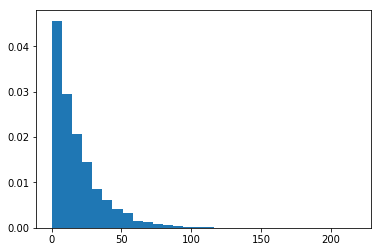

In [89]:
_ = plt.hist(kaza_gun_farklari, bins=30, density=True)

Yukaridaki grafik iki kaza arasindaki gun farkinin bir **Ustel** dagilim oldugunu gosteriyor. Tamamen rastgele ucak kazalari arasindaki gun farkina baktigimizda iki ucak kazasi arasinda bir gun olma olasiligi iki ucak kazasi arasinda 100 gun olma olasiligindan daha fazla oldugunu goruyoruz. Bu da aslinda Tevfikin anlatmak istedigi durumu acikliyor. Yani iki ucak kazasi arasinda bir gun fark olmasi rastgelelikle/tesadufle aciklanabilir. Herhangi bir komploya gerek yok :)

**Ustel** dagilim bize ayrica ortalama iki ucak kazasi arasindaki farkin da $\lambda=20$ gun olmasi gerektigini soyler. Bu durumda 19000 gun farkinin ortalamasi yaklasik olarak 365/20 = 18.25 olmasi gerekir. Bakalim:

In [90]:
gun_farklari.mean()

18.842105263157894

Gercekten de simulasyon ile elde ettigimiz deger analitik deger olan 18.25'e cok yakin.

Elimizde empirik veri seti olduguna gore birkac ilginc soru sorabiliriz:
 1. Herhangi iki kaza arasinda 50 gunden az olma olasiligi nedir?
 2. Herhangi iki kaza arasinda 100 gunden fazla olasiligi nedir?
 3. Herhangi iki kaza arasinda 0 ya da 1 gun olma olasiligi nedir?
 4. Kazalarin %90i arasinda en fazla kac gun vardir?


In [91]:
# herhangi iki kaza arasinda 50 gunden olma olasiligi nedir?
np.mean(kaza_gun_farklari < 50).round(3)

0.935

`%93` olasilikla herhangi iki kaza arasinda 50 gunden az vardir

In [92]:
# herhangi iki kaza arasinda 100 gunden olma olasiligi nedir?
np.mean(kaza_gun_farklari > 100).round(3)

0.004

In [93]:
# Iki kaza arasinda 0 ya da 1 gun olma olasiligi nedir?
np.mean(kaza_gun_farklari <= 1).round(3)

0.08

`%8` olasilikla iki kaza ayni gunde ya da bir gun farkla gerceklesebilir. Ilk bakista her ne kadar dusuk gibi gorunse de bu durum yilda 20 kazanin oldugu durumda kucuk kalmamaktadir. Daha iyi anlayabilmek icin soruyu soyle soralim. iki kazanin arasinda 1 gun ya da az olma olasiliginin %8 oldugunu biliyoruz. Yillik ise 20 kaza gerceklesiyor. Bu durumda toplamda bir yil icerisinde (20 kazada) ardarda (bir ya da 0 gun farkla) kaza gormemizin olasiligi nedir? 

$p = 0.08$ iki ardarda kaza olma olasiligi olduguna gore $1-p = 0.92$ de iki ardarda kaza olmama olasiligidir. Bu durumda 19 kaza gunu farkinda, ardarda kaza olmama olasiligi ise:

In [94]:
0.92**19

0.20510144474217035

Yukarida goruldugu uzere 20 kazanin olugu bir yilda ardarda iki kaza **olmama** olasiligi %20.5 . Yani 20 kaza icinde ardarda iki kaza **olma** olasiligi ise %79.5 . Bu ise yabana atilir bir olasilik degil. Hatta bu olasilik 2 yil icinde de %96'ya cikiyor: !!

In [96]:
1 - 0.92**39

0.9612987255755004

In [101]:
# Kazalarin %90i arasinda en fazla kac gun vardir?
np.percentile(kaza_gun_farklari, 90)

42.0

Her ne kadar komplo teorileri ya da astrologlarin yildiz ay fallari boyle durumlarda daha inandirici geliyor gibi olsa da durun ve sorun. Acaba rastgelelik/tesaduf bu durumu aciklayabilir mi? Eger veriye dayali bir varsayimla yola cikarsaniz, sonucta elle tutulur bir sonuc elde edeceksiniz. Komplo teorilerinden ve fallardan ote, gercek bilgiye ulasin. Herhangi bir yilda %80 olasilikla ardarda ucak kazasi olacaktir. 

Bu arada astrolojiyi boyle durumlarda referans aliyorsaniz size de iki sozum var. Newtonun kutlecekim kanunu yan dairenizde oturan sisman komsunuzun size uyguladigi kutlecekim cekim kuvvetinin Neptunun, Jupiterin, Venusun toplamda size uyguladigindan cok daha fazla oldugunu soyler. Astrologlar gezegenlere bakarak size birseyler anlatiyorsa gidin sisman komsunuza da akil danisin, en azindan istatistiksel olarak komsunuz astrologlara gore daha cok yanilmayacaktir:)   


### Daha az ucak kazasi olursa dagilim degisimi nasil olur?

Elimizdeki `kaza_ornekle` fonksiyonu bircok sorulari sorabilmemizi mumkun kildigina gore yillik ucak kazasi frekansini degistirirsek dagilimimiz nasil degisecektir? Yillik kaza sayisini 20den 5'e indirelim: $\lambda=3$ 

In [104]:
kaza_gun_farklari = kaza_ornekle(baslangic=1, bitis=365, frekans=3, yil_sayisi=5000)

Iki kaza arasindaki ortalama gun farkinin 365/3 ~= 121.3 gun olmasini bekleriz. Bakalim:

In [108]:
kaza_gun_farklari.mean()

121.66031068737915

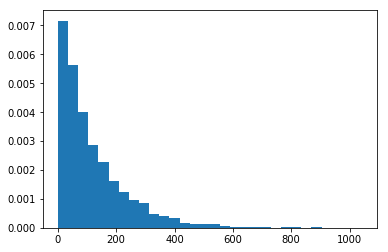

In [98]:
_ = plt.hist(kaza_gun_farklari, bins=30, density=True)

Yukaridaki grafik her ne kadar frekansin 20 oldugu grafige benzese de `x` ekseninin degerlerine dikkatli bakiniz. Bu durumda
1. Herhangi iki kaza arasinda 50 gunden az olma olasiligi nedir
2. Herhangi iki kaza arasinda 100 gunden fazla olasiligi nedir
3. Herhangi iki kaza arasinda 0 ya da 1 gun olma olasiligi nedir?
4. Kazalarin %90i arasinda en fazla kac gun vardir?

In [105]:
# herhangi iki kaza arasinda 50 gunden olma olasiligi nedir?
np.mean(kaza_gun_farklari < 50).round(3)

0.333

In [106]:
# herhangi iki kaza arasinda 100 gunden olma olasiligi nedir?
np.mean(kaza_gun_farklari > 100).round(3)

0.438

In [109]:
# Iki kaza arasinda 0 ya da 1 gun olma olasiligi nedir?
np.mean(kaza_gun_farklari <= 1).round(3)

0.013

In [112]:
# Bir yil icerisinde ardarda iki kaza olma olasiligi nedir:
1-0.987**2

0.02583100000000005

In [110]:
# Kazalarin %90i arasinda en fazla kac gun vardir?
np.percentile(kaza_gun_farklari, 90)

280.0

Yillik kaza ortalamasi 20'den 3'e dustugunde ardarda kaza olma olasiligi da `%79`'dan `%2.5`'e iniyor. Eger yilda ortalama 3 kaza olsaydi o zaman iki kazannin ardarda gelmesi ilginc bir olay olurdu. 

-------
## Mehmet Oner Yalcin  
#### [@oneryalcin](https://twitter.com/oneryalcin)